In this project I'm going to make a basic analysis of how was the 2022 for the ecommerce through 6 stocks that I consider the most representatives:
-  Mercado Libre (MELI), biggest Ecommerce in LATAM.
-  Amazon (AMZN), biggest Ecommerce in the world.
-  AliBaba (BABA), main asian Ecommerce.
-  Shopify (SHOP), canadian Ecommerce.
-  Ebay (EBAY), one of the piooners of Ecommerce.
-  JingDong (JD), Chinese Ecommerce

#### Downloading and Importing Libraries

In [4]:
# Uncomment and run in case you don't have the libraries in your computer
# !pip install yfinance 
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install scipy

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scp

In [43]:
tickers = "MELI AMZN BABA EBAY SHOP JD"

#### Extracting 2022 data using yahoo finance API and creating a table using pandas dataframe.

In [7]:
data = yf.download(tickers=tickers, period='1y', interval='1h')

[*********************100%***********************]  6 of 6 completed


In [8]:
df = pd.DataFrame(data)

In [9]:
df["Close"].head() #We are going to analyze only the closing prices.

,AMZN,BABA,EBAY,JD,MELI,SHOP
Datetime,,,,,,
2021-12-31 09:30:00,168.157974,119.360001,65.940002,70.250000,1346.359985,138.826996
2021-12-31 10:30:00,168.194489,119.360001,66.349998,70.544998,1353.869995,140.082001
2021-12-31 11:30:00,167.636505,119.540001,66.290001,70.500000,1346.109985,139.983994
2021-12-31 12:30:00,167.706009,119.514999,66.480003,70.397003,1348.670044,139.733490
2021-12-31 13:30:00,167.416504,120.239998,66.730003,70.720001,1355.989990,139.380005


#### Graphical Analysis of 2022

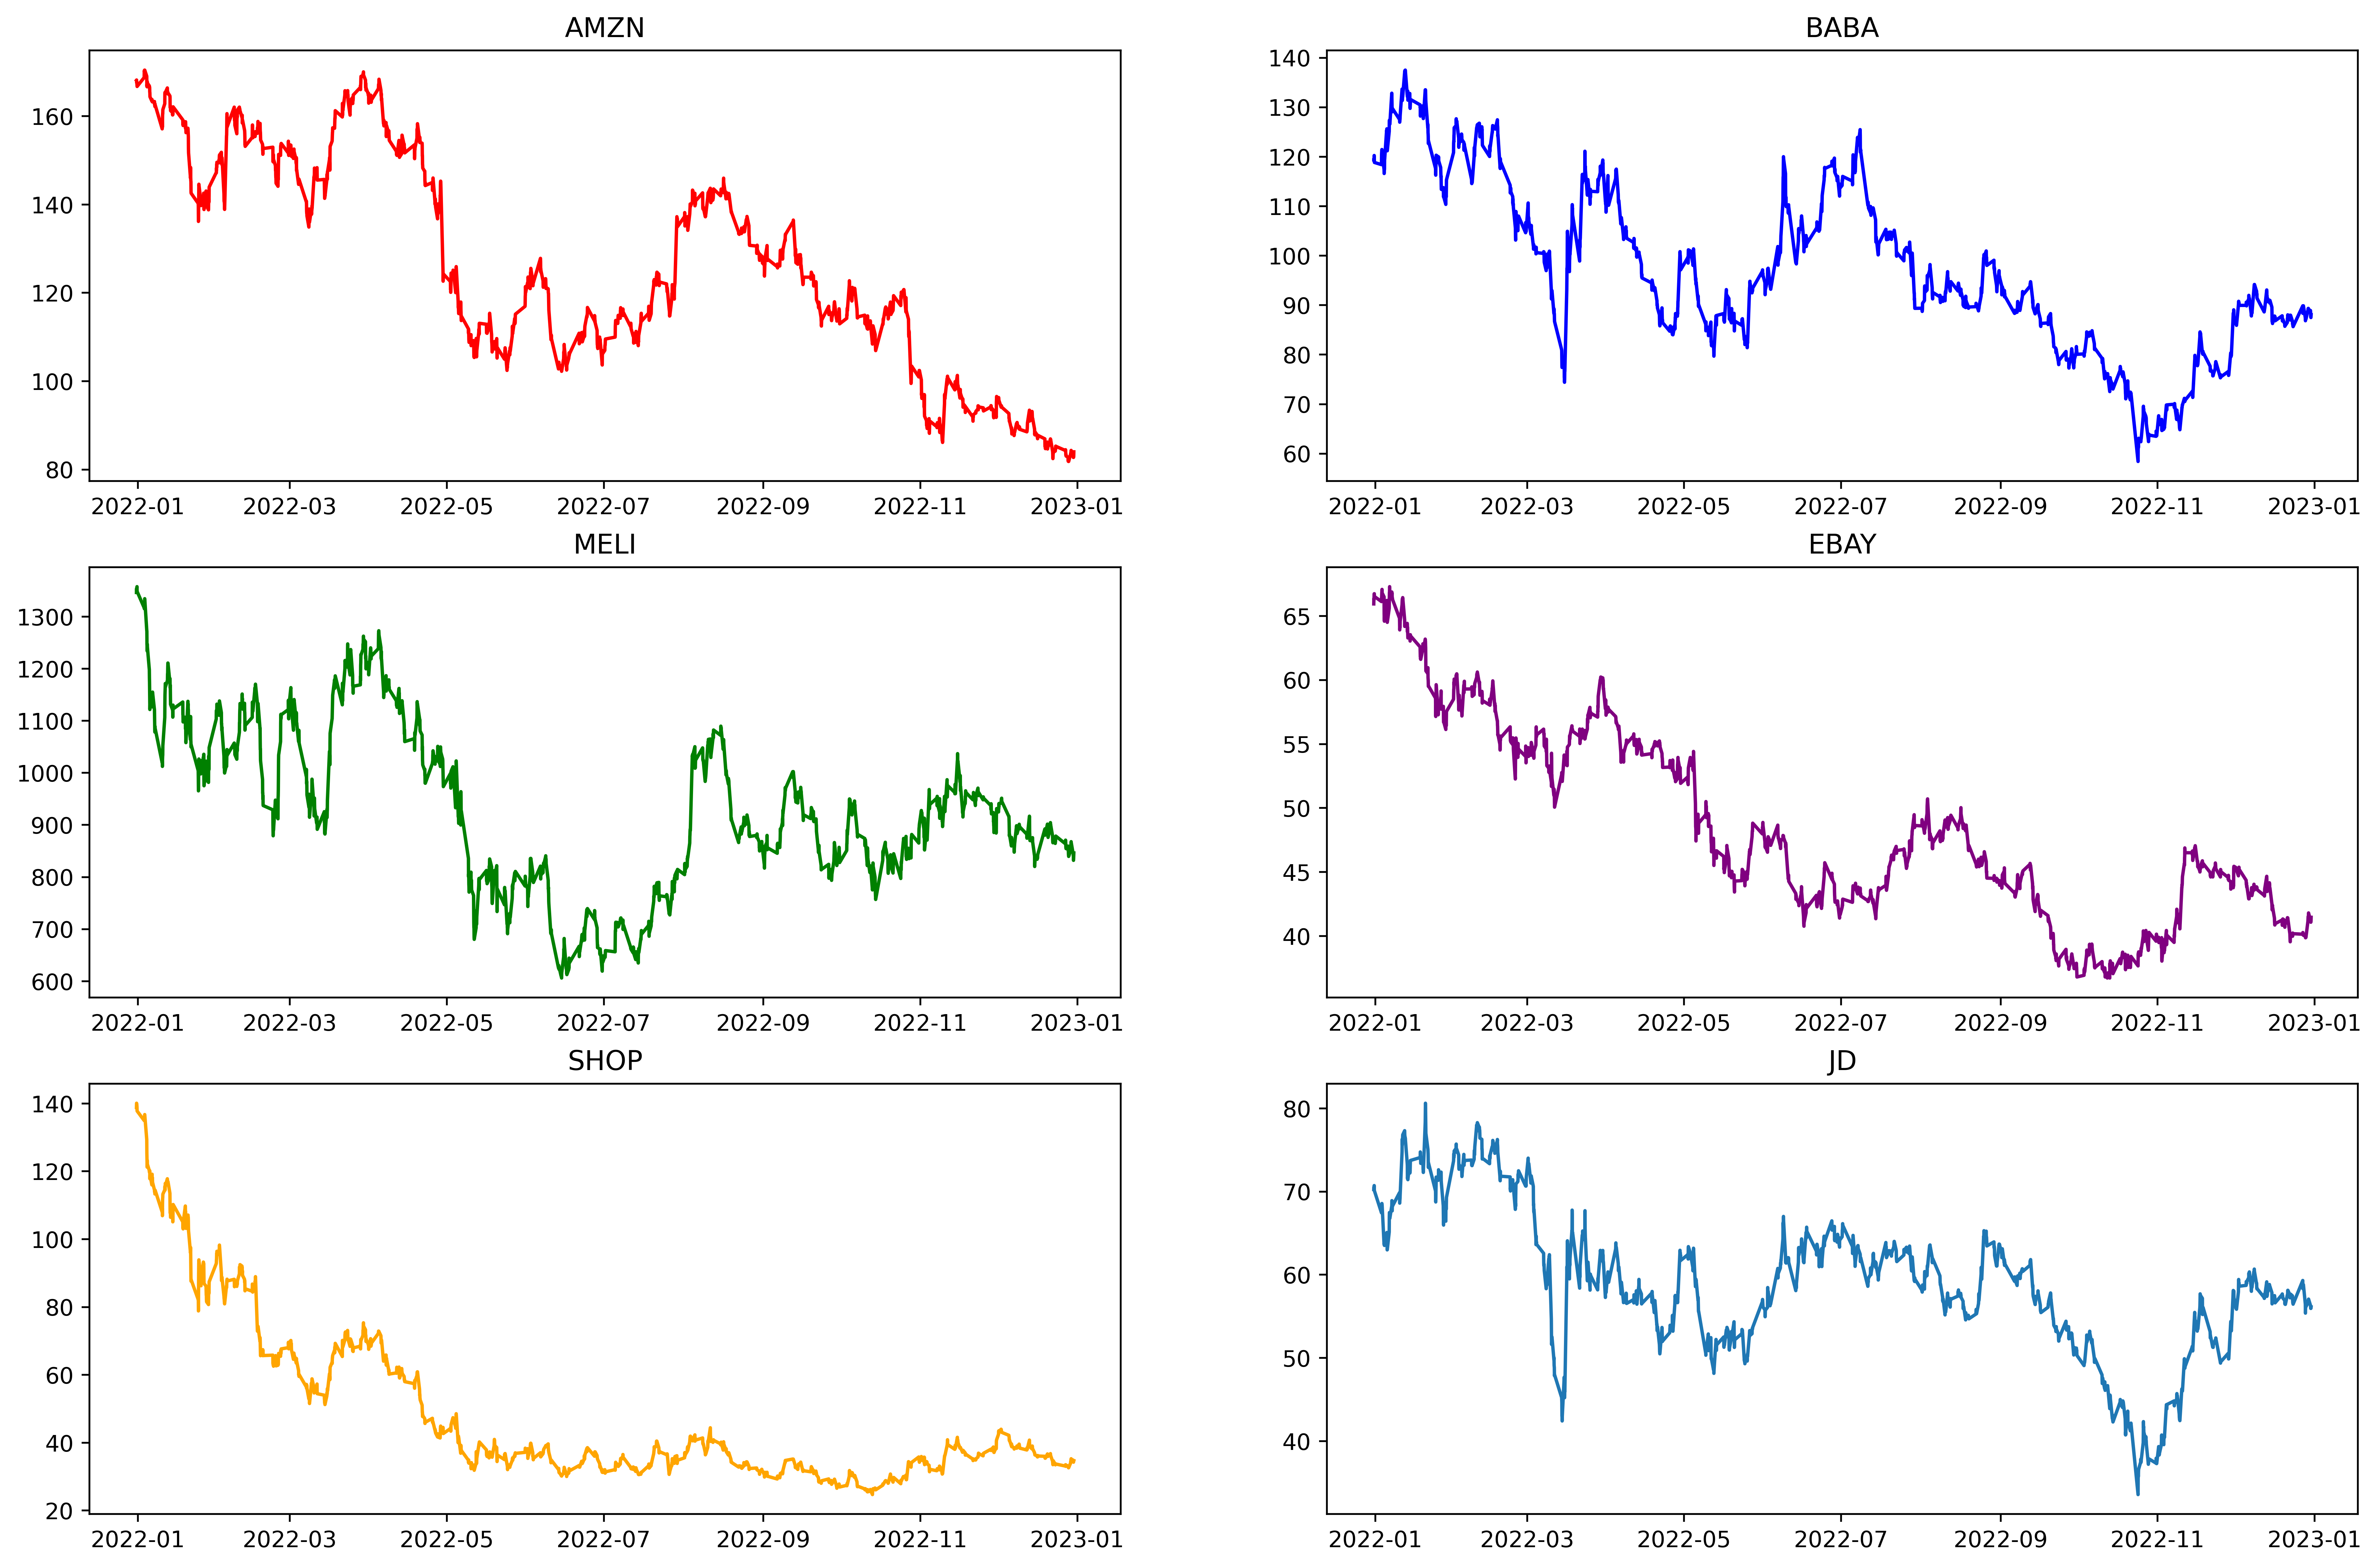

In [10]:
fig = plt.figure(figsize=(18, 6), dpi=500)
ax1 = fig.add_subplot(321)
ax1.plot(df["Close"]['AMZN'], color='r')
ax1.set_title('AMZN')
ax2 = fig.add_subplot(322)
ax2.plot(df["Close"]['BABA'], color='b')
ax2.set_title('BABA')
ax3 = fig.add_subplot(323)
ax3.plot(df["Close"]['MELI'], color='g')
ax3.set_title('MELI')
ax4 = fig.add_subplot(324)
ax4.plot(df["Close"]['EBAY'], color='purple')
ax4.set_title('EBAY')
ax5 = fig.add_subplot(325)
ax5.plot(df["Close"]['SHOP'], color='orange')
ax5.set_title('SHOP')
ax6 = fig.add_subplot(326)
ax6.plot(df["Close"]['JD'])
ax6.set_title('JD')
plt.subplots_adjust(top=7.5, bottom=6) 

In [11]:
df['Close'].iloc[0] #Prices at the first day of 2022

AMZN     168.157974
BABA     119.360001
EBAY      65.940002
JD        70.250000
MELI    1346.359985
SHOP     138.826996
Name: 2021-12-31 09:30:00, dtype: float64

In [12]:
df['Close'].iloc[-1] #Prices at the last day of 2022

AMZN     84.000000
BABA     88.089996
EBAY     41.470001
JD       56.130001
MELI    846.239990
SHOP     34.709999
Name: 2022-12-30 15:30:00, dtype: float64

In [13]:
a = (((df['Close'].iloc[-1] * 100) / df['Close'].iloc[0]) - 100).round(2) 

#### 2022 Relative decrease of each stock (percentage, rounded to two decimals). 

In [24]:
a.astype(str)+'%'

AMZN    -50.05%
BABA     -26.2%
EBAY    -37.11%
JD       -20.1%
MELI    -37.15%
SHOP     -75.0%
dtype: object

#### 2022 Mean relative decrease of each stock (percentage, rounded to two decimals).

In [36]:
print(a.mean().round(2).astype(str)+'%')

-40.94%


#### Extracting 2020-2021 data using yahoo finance API and creating a table using pandas dataframe.

In [26]:
data2 = yf.download(tickers=tickers, start='2020-01-01', end='2022-01-01', interval='1d')

[*********************100%***********************]  6 of 6 completed


In [27]:
df2 = pd.DataFrame(data2)

#### Comparison of the volumes transacted in 2020 & 2021 VS 2022

In [28]:
vol2020 = df2['Volume'].sum().sum() #TOTAL VOLUME TRANSACTED BETWEEN THE 6 STOCKS IN THE 2020-2021 PERIOD.

In [29]:
vol2022 = df['Volume'].sum().sum()*2 #TOTAL VOLUME TRANSACTED BETWEEN THE 6 STOCKS IN 2022. 
#Multiplied by two for the comparison with the 2020-2021 period.

In [37]:
print((((vol2022 * 100 / vol2020) - 100).round(2)).astype(str)+'%')
#The transacted volume was 35% lower in 2022 compared with 2020-2021.

-34.74%


#### Graphical analysis of 2020-2021 period

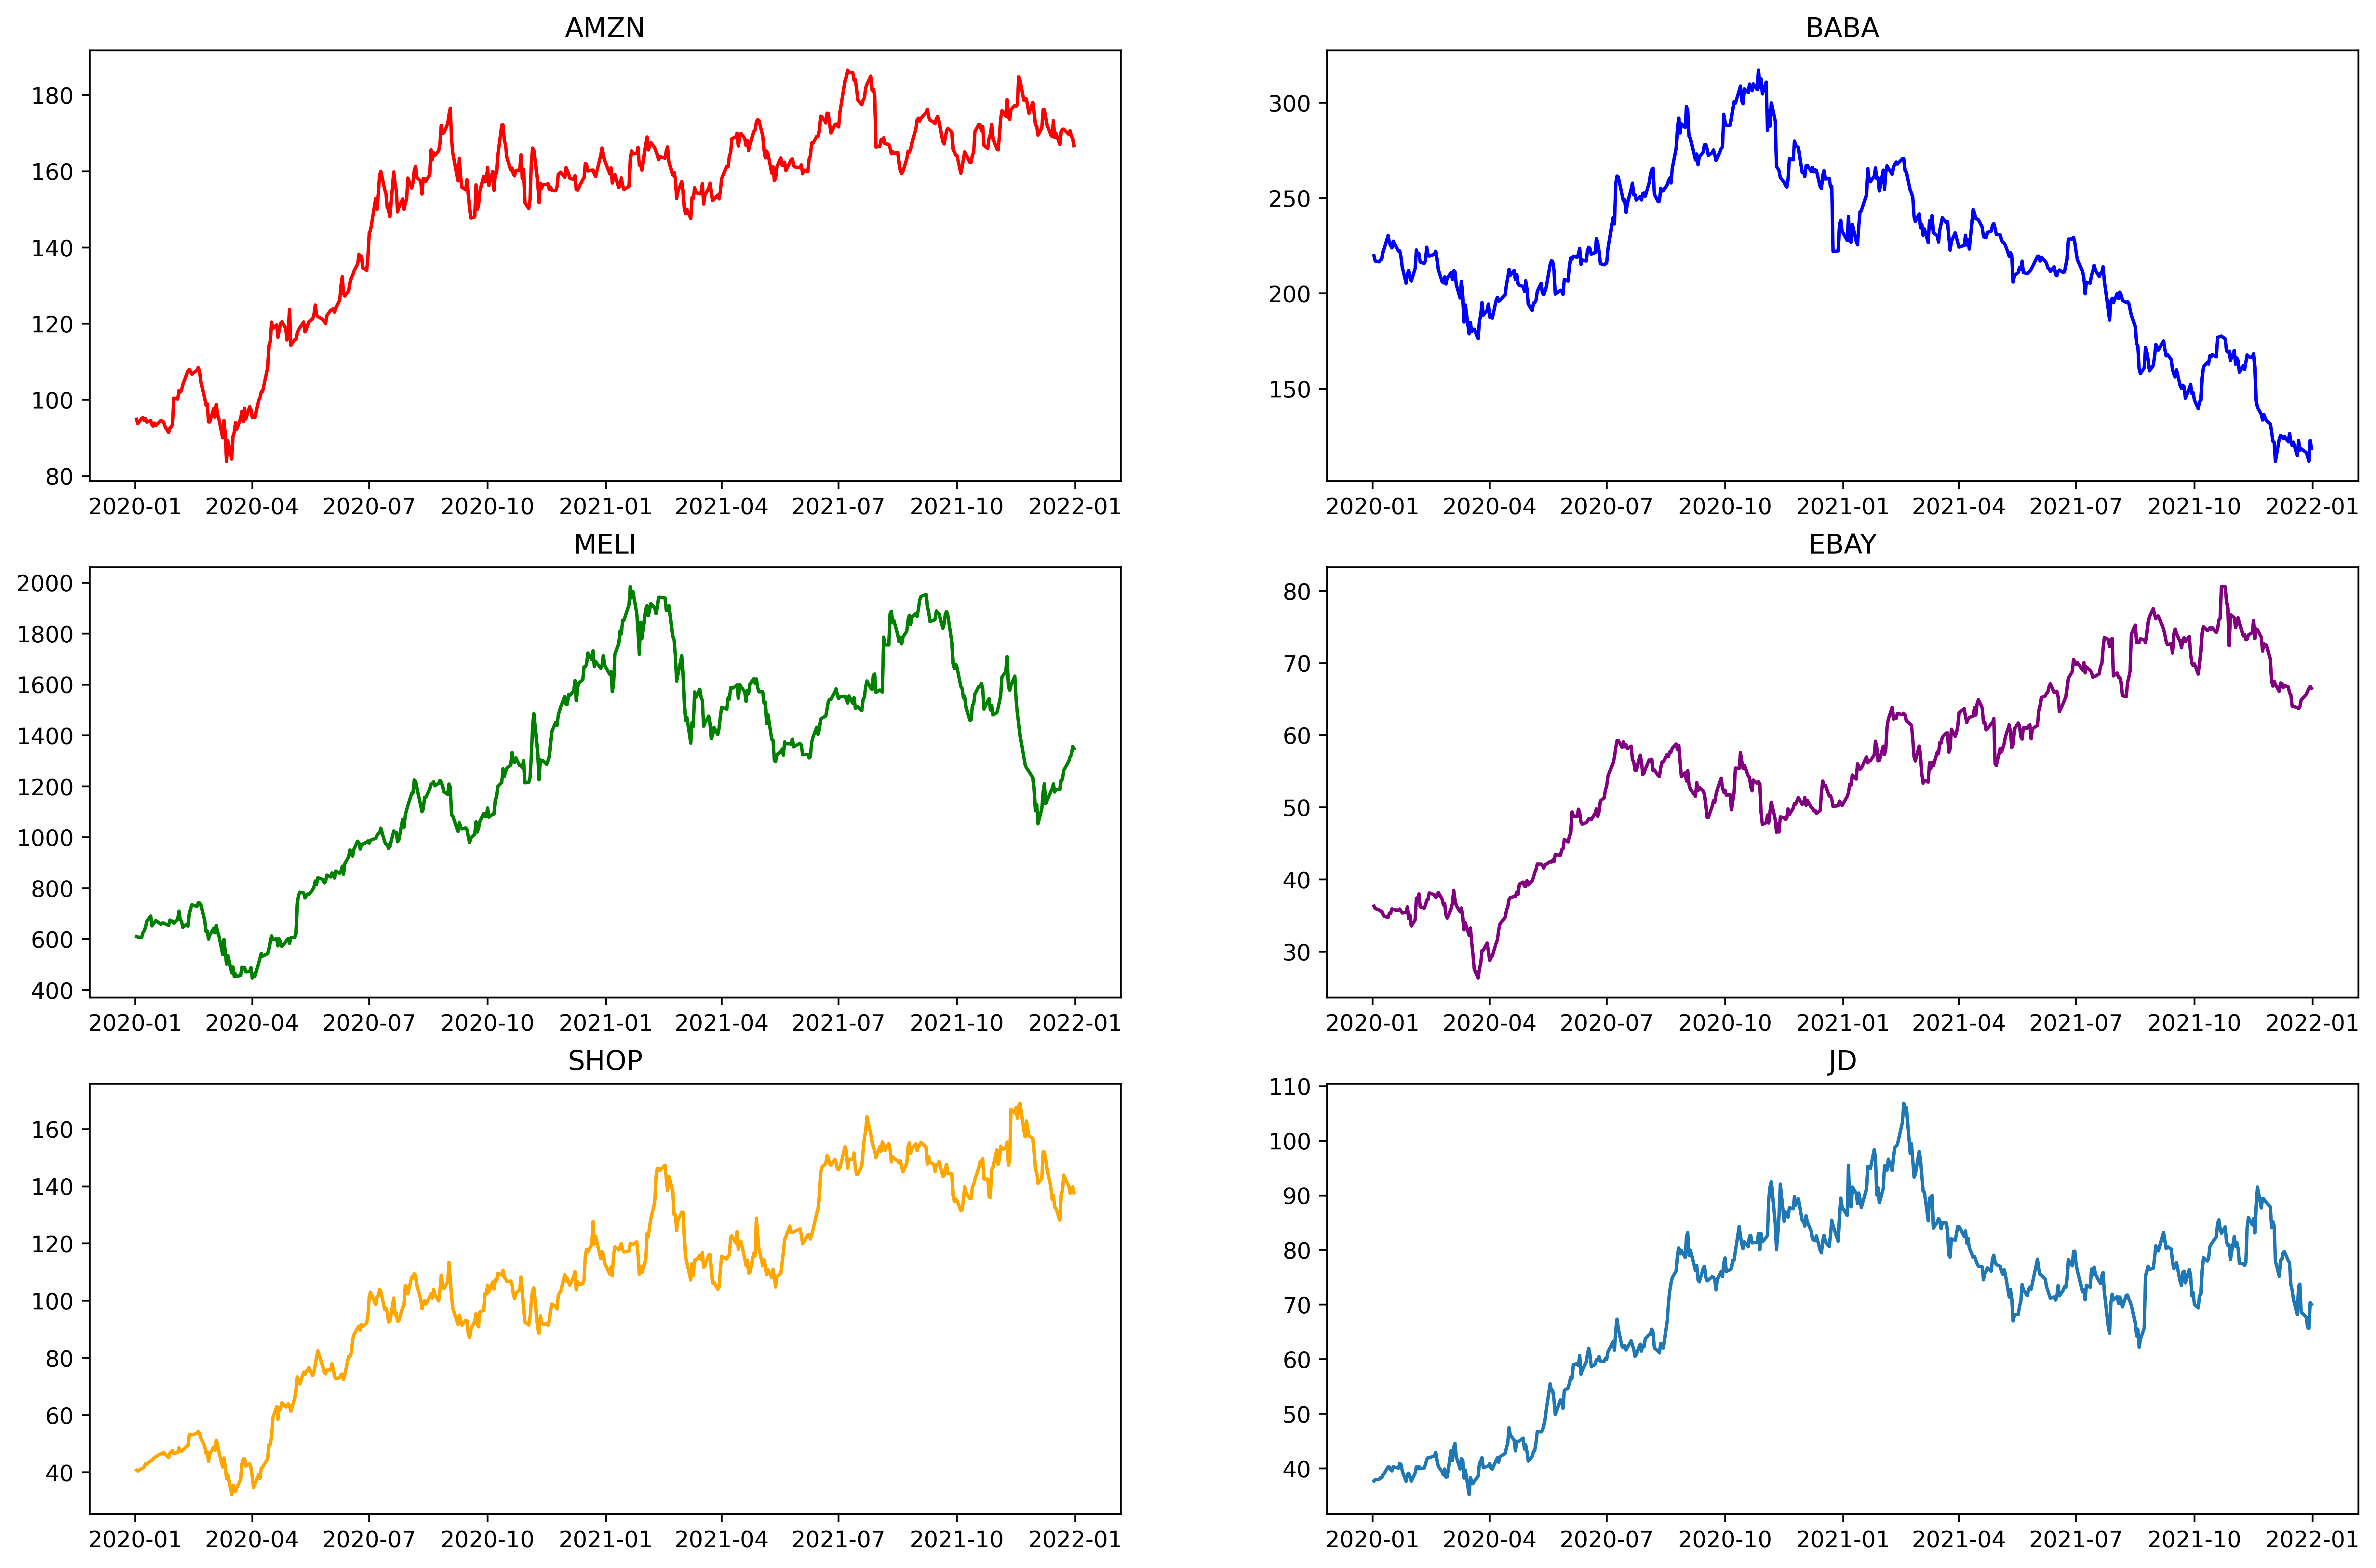

In [105]:
fig = plt.figure(figsize=(18, 6), dpi=500)
ax1 = fig.add_subplot(321)
ax1.plot(df2["Close"]['AMZN'], color='r')
ax1.set_title('AMZN')
ax2 = fig.add_subplot(322)
ax2.plot(df2["Close"]['BABA'], color='b')
ax2.set_title('BABA')
ax3 = fig.add_subplot(323)
ax3.plot(df2["Close"]['MELI'], color='g')
ax3.set_title('MELI')
ax4 = fig.add_subplot(324)
ax4.plot(df2["Close"]['EBAY'], color='purple')
ax4.set_title('EBAY')
ax5 = fig.add_subplot(325)
ax5.plot(df2["Close"]['SHOP'], color='orange')
ax5.set_title('SHOP')
ax6 = fig.add_subplot(326)
ax6.plot(df2["Close"]['JD'])
ax6.set_title('JD')
plt.subplots_adjust(top=7.5, bottom=6) 

#### 2020-2021 Relative increase of each stock (percentage, rounded to two decimals).

In [39]:
z = (((df2['Close'].iloc[-1] * 100) / df2['Close'].iloc[0]) - 100).round(2)

In [40]:
z.astype(str)+'%'

AMZN     75.68%
BABA    -45.95%
EBAY      83.2%
JD       85.71%
MELI    120.98%
SHOP    237.75%
dtype: object

Alibaba is an exception. We can adjudge this to the various polemics that this company had during this period, such as the mysterious disappearance of Jack Ma (CEO and founder of Alibaba), the antitrust fine of 2.8 billion USD and the continuous rumors that BABA was going to be delisted from the NYSE.

#### 2020-2021 Mean relative increase of the stocks (percentage, rounded to two decimals).

In [42]:
print((z.mean().round(2)).astype(str)+'%') #Even with BABA, the mean increment was of 93%.

92.9%


### CONCLUSION

We can see how there was a boom in the price of the ecommerce stocks that began at 2020 and lasted well entered the 2021, with a 93% increment as a mean. This is clearly related to the Covid-19 Pandemic. During the global lockdown, ecommerce were the safest way to shop, so their earnings skyrocketed during that period. 

In 2022 there was a fall in the stock prices, with a 41% decrease as a mean. This is just a logical market correction, a 
compensation for the excessive expectation generated during the pandemic.

We can also appreciate in the 35% decrease in the transacted volume of the stocks that ecommerce are not such a trending as during the pandemic.

If I had to make a bet, I think that now is a good time to buy ecommerce related stocks if you go for the long run. The prices could continue decreasing, but I don't think that 2023 will be nearly as bad as 2022 for the ecommerce business.

This analysis could have been improved by comparing the year earnings generated in the pandemic era vs the post-pandemic era. Also, as important as the quantitative analysis is the qualitative and business model analysis. This was just a basic analysis to show in a quick way how was the 2022 for the ecommerce.